<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/Shared_MiniProject2_20240516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network - Mini Project 2

# A. Load Dataset Fashion-MNIST

In [1]:
import tensorflow as tf

# Load Fashion-MNIST dataset
(train_images_ori, train_labels_ori), (test_images_ori, test_labels_ori) = tf.keras.datasets.fashion_mnist.load_data()

# Print the shape of the training and test datasets
print("Training images shape:", train_images_ori.shape)
print("Training labels shape:", train_labels_ori.shape)
print("Test images shape:", test_images_ori.shape)
print("Test labels shape:", test_labels_ori.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


# B. Show Dataset Sample

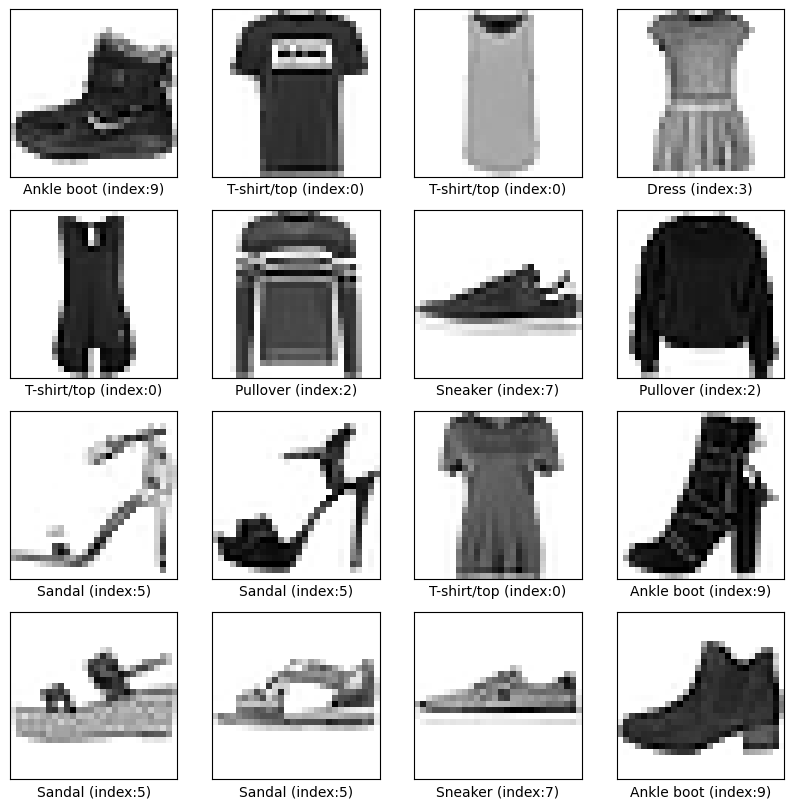

In [2]:
import matplotlib.pyplot as plt
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to display images along with their labels
def show_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel("{} (index:{})".format(class_names[labels[i]],labels[i]))
    plt.show()

# Show a batch of images with their labels
show_images(train_images_ori, train_labels_ori, class_names, num_images=16)

# C. Select Dataset

**Select several dataset to use**

In [3]:
num_train_data = 1000
num_test_data = int(0.2 * num_train_data)  # Computing num_test_data as 20% of num_train_data

# Select subset of data
train_images_subset = train_images_ori[:num_train_data]
train_labels = train_labels_ori[:num_train_data]
test_images_subset = test_images_ori[:num_test_data]
test_labels = test_labels_ori[:num_test_data]

print(f"number of train data: {num_train_data}")
print(f"number of test data: {num_test_data}")

number of train data: 1000
number of test data: 200


**Show data train composition**

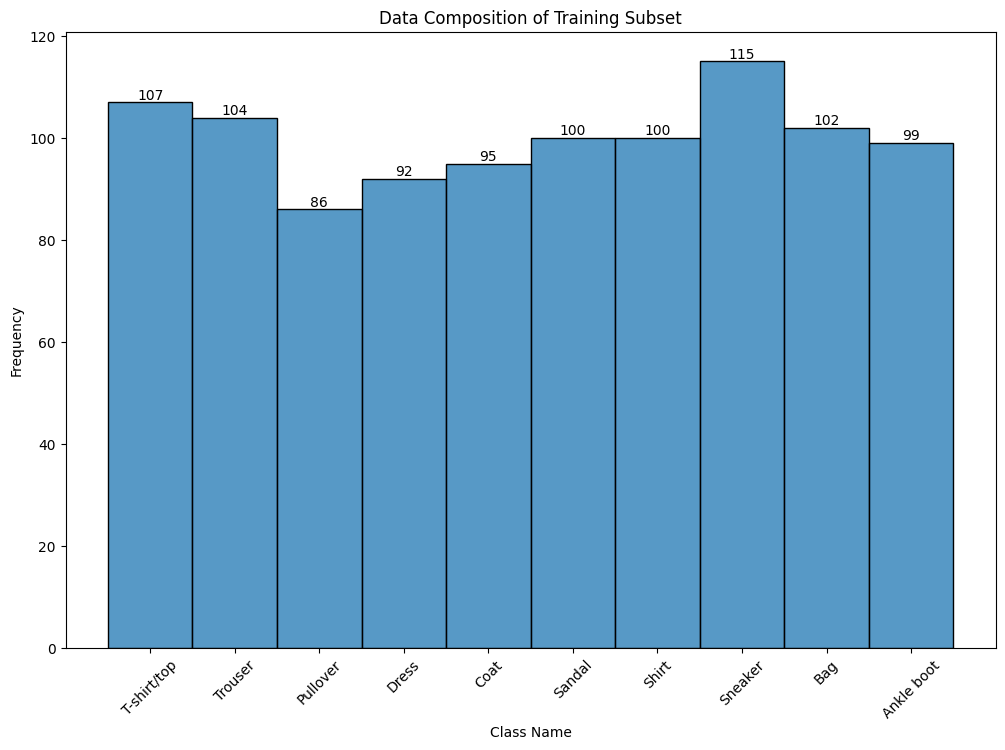

In [4]:
import seaborn as sns
import numpy as np

y_subset = train_labels
# Count the occurrences of each label in the subset
unique, counts = np.unique(y_subset, return_counts=True)

# Create a bar plot using sns.histplot
plt.figure(figsize=(12, 8))
ax = sns.histplot(y_subset, discrete=True)

# Set x-ticks to class names
ax.set_xticks(unique)
ax.set_xticklabels([class_names[i] for i in unique], rotation=45)

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set labels and title
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.title('Data Composition of Training Subset')
plt.show()

**Show data test composition**

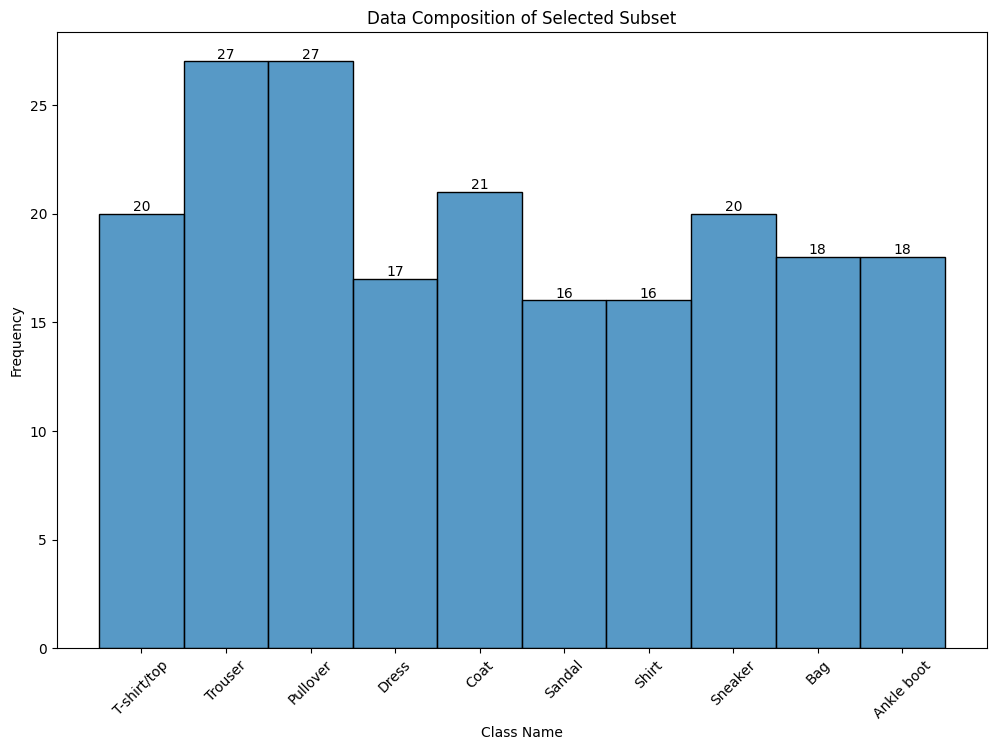

In [5]:
import seaborn as sns
import numpy as np

y_subset = test_labels
# Count the occurrences of each label in the subset
unique, counts = np.unique(y_subset, return_counts=True)

# Create a bar plot using sns.histplot
plt.figure(figsize=(12, 8))
ax = sns.histplot(y_subset, discrete=True)

# Set x-ticks to class names
ax.set_xticks(unique)
ax.set_xticklabels([class_names[i] for i in unique], rotation=45)

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set labels and title
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.title('Data Composition of Selected Subset')
plt.show()

# D. Normalize Image

**Benefits of Normalization**
1. **Numerical Stability**: Neural networks work better with normalized data because it can help with numerical stability during training, making the optimization process more efficient.
2. **Faster Convergence**: Normalized data can lead to faster convergence during training because the gradients are more stable and consistent.
3. **Consistency**: Having data in a similar range makes it easier for the neural network to learn the weights and biases effectively.

In [6]:
# Normalize the pixel values
train_images = train_images_subset  / 255.0
test_images = test_images_subset / 255.0

#Contoh Perbedaan data setelah normalisasi
print(f"Original image {train_images_ori[0].shape}:\n{train_images_ori[0]}")
print(f"Normalized image {train_images[0].shape}:\n{train_images[0]}")

Original image (28, 28):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

# E. Reshaping The Data

1. The code you provided reshapes the data to add a channel dimension, making the images suitable for input into a CNN, which expects input data with a shape of (**height, width, channels**)
2. Convolutional Neural Networks (CNNs) require input data with a specific shape that includes the height, width, and number of channels:
  * **Height and Width**: These are the dimensions of the image (28x28 in this case).
  * **Channels**: This indicates the depth of the image (1 for grayscale, 3 for RGB).

By reshaping the images to (**28, 28, 1**), you prepare the data for processing by CNN layers that expect a 4D input tensor, where the first dimension is the batch size (number of images), and the last three dimensions are the height, width, and channels of each image.

In [7]:
# Reshape dataset to have a single channel (grayscale)
train_images_reshape = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_reshape = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Print shapes to verify
print("train_images_reshape:", train_images_reshape.shape)  # Output: (60000, 28, 28, 1)
print("test_images_reshape:", test_images_reshape.shape)    # Output: (10000, 28, 28, 1)

train_images_reshape: (1000, 28, 28, 1)
test_images_reshape: (200, 28, 28, 1)


# F. Build Model of CNN

**-Install keras_tuner**

In [8]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


**1. Build model of CNN**

In [10]:
def build_model(hp):
    model = tf.keras.Sequential([

    # First conv_block
    tf.keras.layers.Conv2D(
        filters = hp.Choice('conv_1_filter', values=[16, 32, 64, 128]),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,4]),
        activation='relu',
        input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Second conv_block
    tf.keras.layers.Conv2D(
        filters = hp.Choice('conv_2_filter', values=[16, 32, 64, 128]),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,4]),
        activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # --------------------------------
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = hp.Choice('units', values=[32, 64, 128, 256]),
                       activation='relu'),
    tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)),

    # --------------------------------
    tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',
              values=[1e-2, 1e-3, 1e-4])),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

**2. Tuning hyperparameter** <br>
**a. Setting tuner**

In [11]:
from tensorflow import keras
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=5,
                     factor=3,
                     hyperband_iterations=3)
tuner.search_space_summary()

Search space summary
Default search space size: 7
conv_1_filter (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 4], 'ordered': True}
conv_2_filter (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 4], 'ordered': True}
units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256], 'ordered': True}
dropout (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


**b.Search Best Hyperparameters**

search best hyperparameter

In [12]:
x_train = train_images_reshape
tuner.search(x_train,train_labels, epochs=3, validation_split=0.2)

Trial 30 Complete [00h 00m 06s]
val_accuracy: 0.39500001072883606

Best val_accuracy So Far: 0.8149999976158142
Total elapsed time: 00h 03m 24s


Show best hyperparameter

In [13]:
best_hps = best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""conv_1_filter is {best_hps.get('conv_1_filter')}""")
print(f"""conv_1_kernel is {best_hps.get('conv_1_kernel')}""")
print(f"""conv_2_filter is {best_hps.get('conv_2_filter')}""")
print(f"""conv_2_kernel is {best_hps.get('conv_2_kernel')}""")
print("-------------------------------------------------")
print(f"""units is {best_hps.get('units')}""")
print(f"""learning_rate is {best_hps.get('learning_rate')}""")
print(f"""dropout is {best_hps.get('dropout')}""")

conv_1_filter is 32
conv_1_kernel is 4
conv_2_filter is 128
conv_2_kernel is 3
-------------------------------------------------
units is 256
learning_rate is 0.01
dropout is 0.30000000000000004


**3. Training Model**

In [14]:
import numpy as np

# Define EarlyStopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# Train the model
# Build the best model
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(x_train, train_labels,
                         epochs=50,
                         validation_split=0.2,
                         callbacks=[early_stop])

# Get the best epoch based on validation accuracy
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_accuracy = max(history.history['val_accuracy'])

print("Best epoch based on validation accuracy:", best_epoch)
print("Best validation accuracy:", best_val_accuracy)

Epoch 1/50
25/25 [==============================] - 2s 50ms/step - loss: 1.9418 - accuracy: 0.3587 - val_loss: 1.0665 - val_accuracy: 0.6150
Epoch 2/50
25/25 [==============================] - 1s 45ms/step - loss: 1.0722 - accuracy: 0.6175 - val_loss: 0.8820 - val_accuracy: 0.6900
Epoch 3/50
25/25 [==============================] - 2s 61ms/step - loss: 0.8004 - accuracy: 0.7125 - val_loss: 0.6806 - val_accuracy: 0.7300
Epoch 4/50
25/25 [==============================] - 2s 70ms/step - loss: 0.6243 - accuracy: 0.7800 - val_loss: 0.6108 - val_accuracy: 0.7800
Epoch 5/50
25/25 [==============================] - 2s 66ms/step - loss: 0.5688 - accuracy: 0.7950 - val_loss: 0.7385 - val_accuracy: 0.7450
Epoch 6/50
25/25 [==============================] - 1s 42ms/step - loss: 0.5215 - accuracy: 0.8150 - val_loss: 0.5657 - val_accuracy: 0.7800
Epoch 7/50
25/25 [==============================] - 1s 42ms/step - loss: 0.4351 - accuracy: 0.8350 - val_loss: 0.5633 - val_accuracy: 0.8100
Epoch 8/50
25

Show Accuracy Graphic

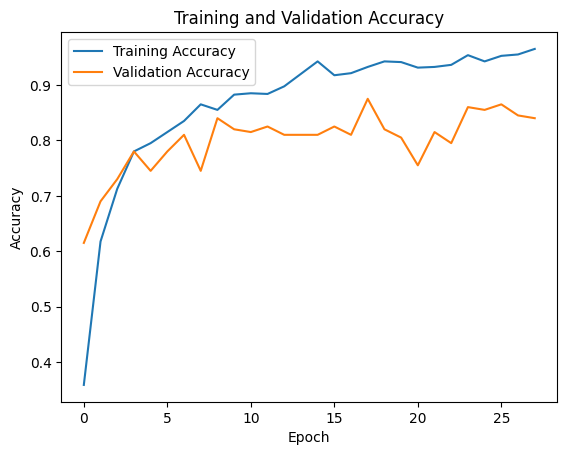

In [16]:
# Plot accuracy for each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Show Loss Graphic

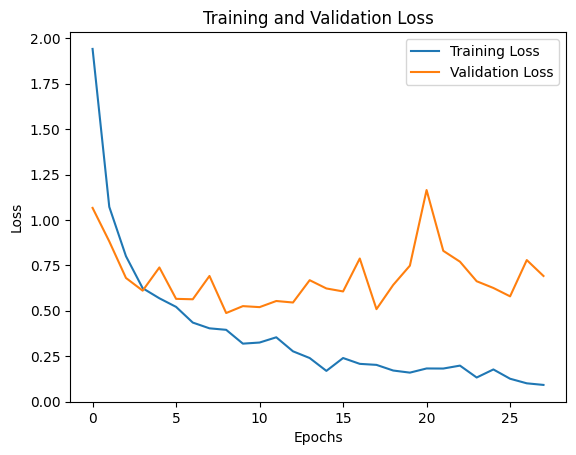

In [17]:
# Plotting the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# G. CNN Model Summary

Print model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       36992     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

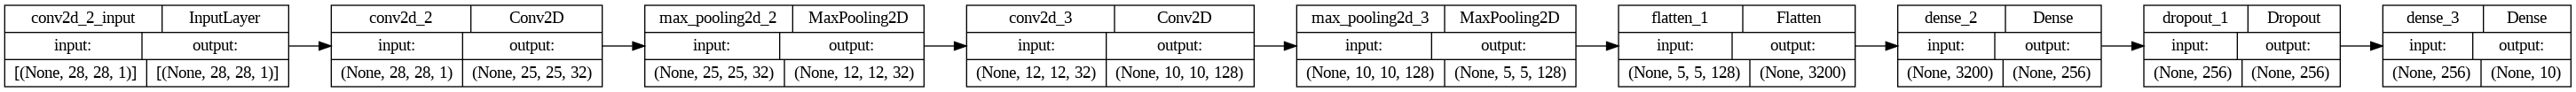

In [19]:
hypermodel.summary()
best_hps = best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""conv_1_filter is {best_hps.get('conv_1_filter')}""")
print(f"""conv_1_kernel is {best_hps.get('conv_1_kernel')}""")
print(f"""conv_2_filter is {best_hps.get('conv_2_filter')}""")
print(f"""conv_2_kernel is {best_hps.get('conv_2_kernel')}""")
print("-------------------------------------------------")
print(f"""units is {best_hps.get('units')}""")
print(f"""learning_rate is {best_hps.get('learning_rate')}""")
print(f"""dropout is {best_hps.get('dropout')}""")
keras.utils.plot_model(hypermodel, show_shapes=True,rankdir='LR')

Download model generator library

In [20]:
# Download draw_convnet.py from GitHub
!wget https://raw.githubusercontent.com/gwding/draw_convnet/master/draw_convnet.py

--2024-05-22 12:10:24--  https://raw.githubusercontent.com/gwding/draw_convnet/master/draw_convnet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9248 (9.0K) [text/plain]
Saving to: ‘draw_convnet.py’

draw_convnet.py     100%[===================>]   9.03K  --.-KB/s    in 0s      

2024-05-22 12:10:24 (83.8 MB/s) - ‘draw_convnet.py’ saved [9248/9248]



Parsing Text from hypermodel summary

In [21]:
import io
import re
from contextlib import redirect_stdout

# Capture the model summary output
stream = io.StringIO()
with redirect_stdout(stream):
    hypermodel.summary()
summary_str = stream.getvalue()

# Define a function to extract dimensions from each layer type
def extract_layer_dimensions(summary_str, layer_types):
    layer_info = {layer_type: [] for layer_type in layer_types}
    for line in summary_str.split('\n'):
        for layer_type in layer_types:
            if layer_type in line:
                match = re.search(r'\((None, [0-9]+(?:, [0-9]+)*)\)', line)
                if match:
                    layer_info[layer_type].append(match.group(1))
    return layer_info

# List of layer types to extract
layer_types = ['Conv2D', 'max_pooling2d', 'Flatten', 'Dense', 'Dropout']

# Extract the dimensions
layer_dimensions = extract_layer_dimensions(summary_str, layer_types)

setting_model = []
# Print the dimensions for each layer type
for layer_type, dims in layer_dimensions.items():
    for idx, dim in enumerate(dims):
        #print(f'{layer_type} Layer {idx + 1} Output Dimensions: {dim}')
        try:
            # Parsing text separated by commas
            parsed_list = dim.split(",")
            # Convert each element to int, handling 'None' separately
            converted_list = [int(x) if x != 'None' else None for x in parsed_list]
            setting_model = setting_model + converted_list
        except ValueError:
            print("The input is not an integer. It might be a word.")
imsize_conv2d_1 = setting_model[1]
imsize_max_pooling2d_1 = setting_model[9]
imsize_conv2d_2 = setting_model[5]
imsize_max_pooling2d_2 = setting_model[13]

depth_conv2d_1 = setting_model[3]
depth_max_pooling2d_1 = setting_model[11]
depth_conv2d_2 = setting_model[7]
depth_max_pooling2d_2 = setting_model[15]

depth_flatten = setting_model[17]
depth_dense_1 = setting_model[19]
depth_dropout = setting_model[23]
depth_dense2 = setting_model[21]

kernel_conv2d_1 = best_hps.get('conv_1_kernel')
kernel_max_pooling2d_1 = 2
kernel_conv2d_2 = best_hps.get('conv_2_kernel')
kernel_max_pooling2d_2 = 2

print(setting_model)

[None, 25, 25, 32, None, 10, 10, 128, None, 12, 12, 32, None, 5, 5, 128, None, 3200, None, 256, None, 10, None, 256]


Generate model of CNN

<ipython-input-22-418503a7576e>:109: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


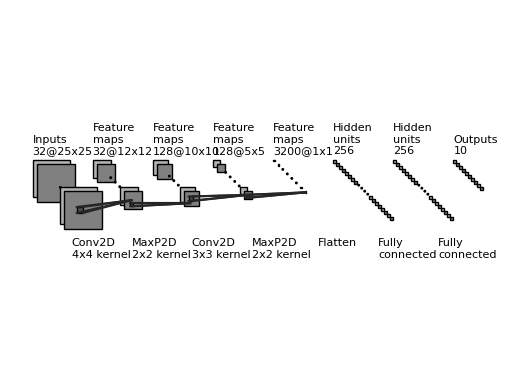

In [22]:
import draw_convnet
import os
import numpy as np
import matplotlib.pyplot as plt

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.

fc_unit_size = 2
layer_width = 40
flag_omit = True

patches = []
colors = []

fig, ax = plt.subplots()

############################
# conv layers
size_list = [(imsize_conv2d_1, imsize_conv2d_1), (imsize_max_pooling2d_1, imsize_max_pooling2d_1), (imsize_conv2d_2, imsize_conv2d_2), (imsize_max_pooling2d_2, imsize_max_pooling2d_2), (1, 1)]
num_list = [depth_conv2d_1, depth_max_pooling2d_1, depth_conv2d_2, depth_max_pooling2d_2, depth_flatten]
x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        draw_convnet.add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        draw_convnet.add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    draw_convnet.label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]))

############################
# in between layers
start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
patch_size_list = [(kernel_conv2d_1, kernel_conv2d_1), (kernel_max_pooling2d_1, kernel_max_pooling2d_1), (kernel_conv2d_2, kernel_conv2d_2), (kernel_max_pooling2d_2, kernel_max_pooling2d_2)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Conv2D', 'MaxP2D', 'Conv2D', 'MaxP2D']

for ind in range(len(patch_size_list)):
    draw_convnet.add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)
    draw_convnet.label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
        patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
    )


############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 3
num_list = [256, 256, 10]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        draw_convnet.add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        draw_convnet.add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind],
                  loc_diff=loc_diff_list[ind])
    draw_convnet.label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]))

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    draw_convnet.label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, draw_convnet.Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.tight_layout()
plt.axis('equal')
plt.axis('off')
plt.show()
fig.set_size_inches(8, 2.5)

fig_dir = './'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
            bbox_inches='tight', pad_inches=0)

# H. Evaluation/Test

7/7 [==============================] - 0s 16ms/step
Test Image: 200


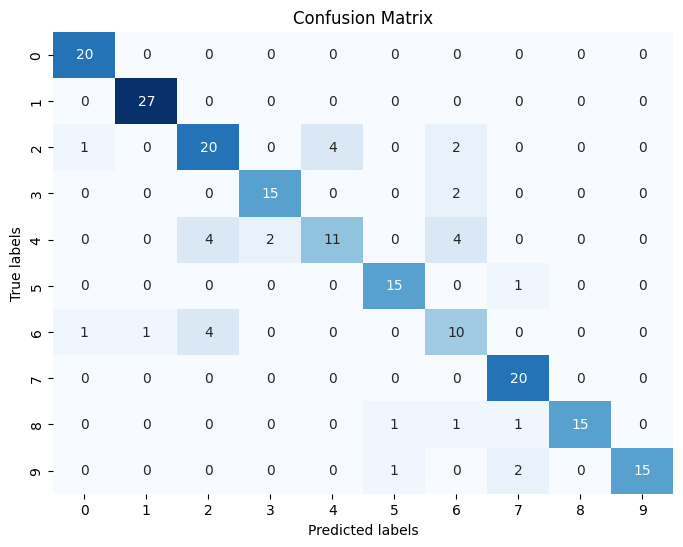

Accuracy: 0.84
Sensitivity: 1.0
Specificity: 1.0
F1 Score: 0.8381190476190477


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming `hypermodel` is your trained model and `x_test` contains your test data

x_test = test_images_reshape
# Make predictions
y_pred = np.argmax(hypermodel.predict(x_test), axis=1)

# Compute accuracy
accuracy = accuracy_score(test_labels, y_pred)

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Compute sensitivity and specificity
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]
false_positives = cm[0, 1]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Compute F1 score
f1 = f1_score(test_labels, y_pred, average='weighted')

print("Test Image:",len(test_labels))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

# I. Convolution Image

1/1 [==============================] - 0s 103ms/step


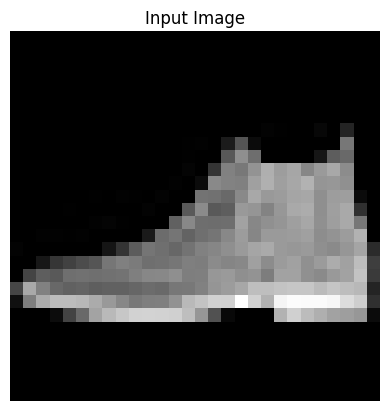

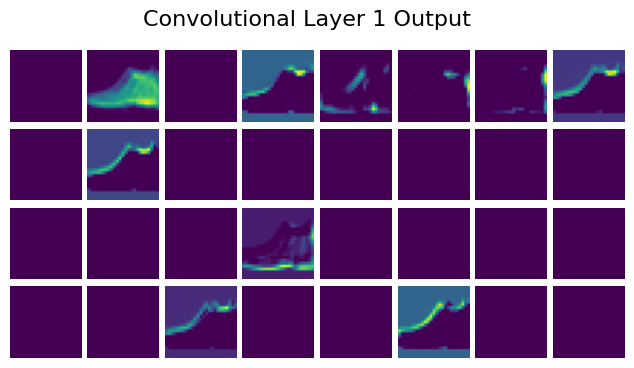

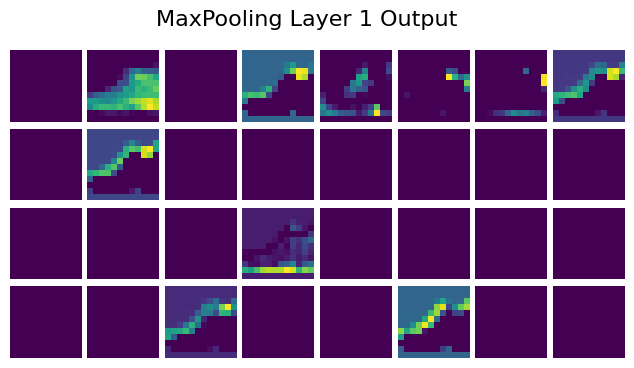

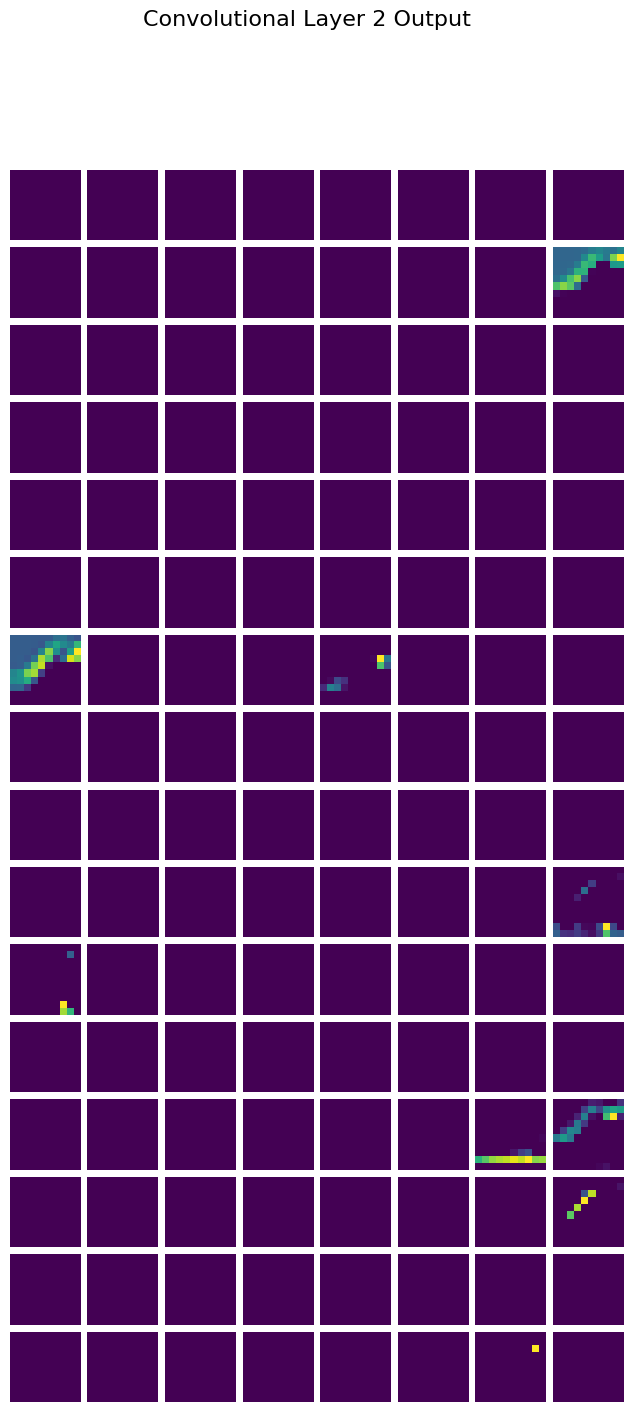

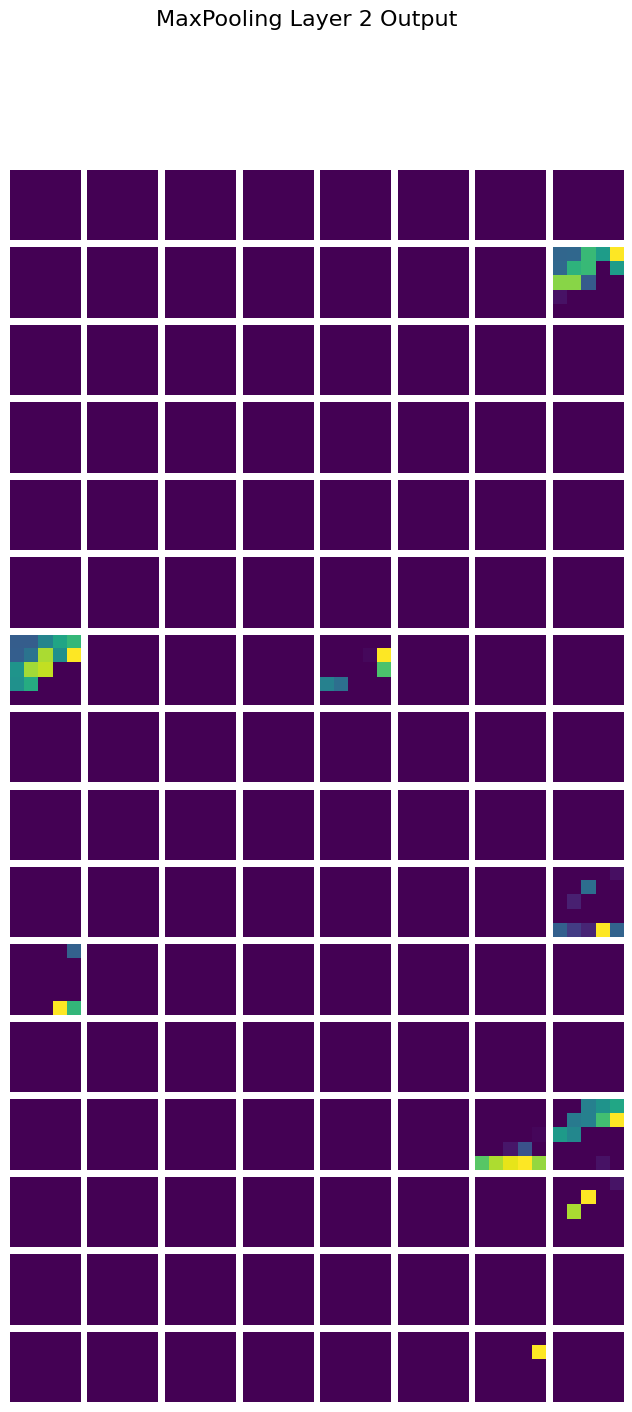

In [24]:
from tensorflow.keras import layers

# Function to extract intermediate layer outputs
layer_outputs = [layer.output for layer in hypermodel.layers if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D))]
activation_model = tf.keras.models.Model(inputs=hypermodel.input, outputs=layer_outputs)

# Visualize intermediate layer outputs for a sample image
sample_image = test_images[0].reshape((1, 28, 28, 1))
activations = activation_model.predict(sample_image)

size_w = 8
size_h = 4

plt.imshow(sample_image.reshape((28, 28)), cmap='gray')  # Reshape if necessary and specify colormap
plt.axis('off')  # Hide axis
plt.title('Input Image')  # Add title
plt.show()

for i, activation in enumerate(activations):
  if isinstance(hypermodel.layers[i], layers.Conv2D):  # Convolutional layer
      n_filters = activation.shape[-1]
      plt.figure(figsize=(size_w, n_filters/size_w))
      cols = 8
      rows = (n_filters - 1) // cols + 1
      for j in range(n_filters):
          plt.subplot(rows, cols, j + 1)
          plt.imshow(activation[0, :, :, j], cmap='viridis')
          plt.axis('off')
      plt.suptitle(f'Convolutional Layer {i // 2 + 1} Output', fontsize=16)
      plt.subplots_adjust(wspace=0, hspace=0.1)  # Adjust spacing between subplots
      plt.show()
  else:  # MaxPooling layer
      n_channels = activation.shape[-1]
      plt.figure(figsize=(size_w, n_filters/size_w))
      cols = 8
      rows = (n_channels - 1) // cols + 1
      for j in range(n_channels):
          plt.subplot(rows, cols, j + 1)
          plt.imshow(activation[0, :, :, j], cmap='viridis')
          plt.axis('off')
      plt.suptitle(f'MaxPooling Layer {i // 2 + 1} Output', fontsize=16)
      plt.subplots_adjust(wspace=0, hspace=0.1)  # Adjust spacing between subplots
      plt.show()